<a href="https://colab.research.google.com/github/TOM-BOHN/MsDS-customer-churn-prediction/blob/main/Data_Clensing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Required Libraries

In [46]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

# Data

## Dataset Source

Attribute                 |Details
:-------------------------|:-----------------------------
**Dataset:**              | Telco Customer Churn (11.1.3+)
**Source Type:**         | Public Dataset
**Source Link:**          | https://www.kaggle.com/datasets/ylchang/telco-customer-churn-1113
**Source Documentation:** | https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

###About Dataset Provider

The datasource used in this analysis was created by the Sample Team at IBM as part of the the IBM Accelerator Catalog, a free platform created to showcase assets and demonstrate the capabilities of the IBM products. This dataset comses from a subset of this platform focused on IBM Cognos Analytics Sample Data. The datset was package on the Kaggle website and is availible for download through the UI or the Kaggle API.

###About Dataset

Specifically, the **Telco Customer Churn (11.1.3+)** data contains information about a fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3. It indicates which customers have left, stayed, or signed up for their service. Multiple important demographics are included for each customer, as well as a Satisfaction Score, Churn Score, and Customer Lifetime Value (CLTV) index. [2]

## Dataset Details

### Dataset Tables
The dataset is comprised of 5 tables, focused on specific details related to the customer.  The tables are:
- **Demographics** : The **person** conceptual entity including demographic details related to each customers included in the dataset.
- **Location** : The **location** conceptual entity, including location information related to where the customer is located in the world. A less grnular form of address information.
- **Population** : Additional statisticss related to the location entity, including the population of each zipcode included in the dataset.
- **Services** : The **transaction** entity in a summerized format, outlining the services / prducts consumed, actions taken by the customer, and transaction / billing details related to the customers purchase.
- **Status** : Additional derived statistics related to the person entity, including survey details, derived scores, and churn information related to each customer.

### Dataset Relationships

The **Services** table is the main fact in the data model.

The following relationships can be used to join the data:
- **Services** joined to **Demographics** joined on CustomerID = CustomerID
- **Services** joined to **Status** joined on CustomerID = CustomerID
- **Demographics** joined to **Location** joined on CustomerID = CustomerID
- **Location** joined to **Population** joined on ZipCode = ZipCode

## Dataset Dictionary

Datails on each field in the original dataset can be found in the following data dictionary.

###Demographics
- **CustomerID**: A unique ID that identifies each customer.
- **Count**: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.
- **Gender**: The customer's gender: Male, Female
- **Age**: The customer's current age, in years, at the time the fiscal quarter ended.
- **Senior Citizen**: Indicates if the customer is 65 or older: Yes, No
- **Married**: Indicates if the customer is married: Yes, No
- **Dependents**: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
- **Number of Dependents**: Indicates the number of dependents that live with the customer.

### Location
- **CustomerID**: A unique ID that identifies each customer.
- **Count**: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.
- **Country**: The country of the customer's primary residence.
- **State**: The state of the customer's primary residence.
- **City**: The city of the customer's primary residence.
- **Zip Code**: The zip code of the customer's primary residence.
- **Lat Long**: The combined latitude and longitude of the customer's primary residence.
- **Latitude**: The latitude of the customer's primary residence.
- **Longitude**: The longitude of the customer's primary residence.

###Population
- **ID**: A unique ID that identifies each row.
- **Zip Code**: The zip code of the customer's primary residence.
- **Population**: A current population estimate for the entire Zip Code area.

###Services
- **CustomerID**: A unique ID that identifies each customer.
- **Count**: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.
- **Quarter**: The fiscal quarter that the data has been derived from (e.g. Q3).
- **Referred a Friend**: Indicates if the customer has ever referred a friend or family member to this company: Yes, No
- **Number of Referrals**: Indicates the number of referrals to date that the customer has made.
- **Tenure in Months**: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.
- **Offer**: Identifies the last marketing offer that the customer accepted, if applicable. Values include None, Offer A, Offer B, Offer C, Offer D, and Offer E.
- **Phone Service**: Indicates if the customer subscribes to home phone service with the company: Yes, No
- **Avg Monthly Long Distance Charges**: Indicates the customer’s average long distance charges, calculated to the end of the quarter specified above.
- **Multiple Lines**: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No
- **Internet Service**: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
- **Avg Monthly GB Download**: Indicates the customer's average download volume in gigabytes, calculated to the end of the quarter specified above.
- **Online Security**: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No
- **Online Backup**: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No
- **Device Protection Plan**: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No
- **Premium Tech Support**: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No
- **Streaming TV**: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.
- **Streaming Movies**: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.
- **Streaming Music**: Indicates if the customer uses their Internet service to stream music from a third party provider: Yes, No. The company does not charge an additional fee for this service.
- **Unlimited Data**: Indicates if the customer has paid an additional monthly fee to have unlimited data downloads/uploads: Yes, No
- **Contract**: Indicates the customer's current contract type: Month-to-Month, One Year, Two Year.
- **Paperless Billing**: Indicates if the customer has chosen paperless billing: Yes, No
- **Payment Method**: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
- **Monthly Charge**: Indicates the customer's current total monthly charge for all their services from the company.
- **Total Charges**: Indicates the customer's total charges, calculated to the end of the quarter specified above.
- **Total Refunds**: Indicates the customer's total refunds, calculated to the end of the quarter specified above.
- **Total Extra Data Charges**: Indicates the customer's total charges for extra data downloads above those specified in their plan, by the end of the quarter specified above.
- **Total Long Distance Charges**: Indicates the customer's total charges for long distance above those specified in their plan, by the end of the quarter specified above.

### Status
- **CustomerID**: A unique ID that identifies each customer.
- **Count**: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.
- **Quarter**: The fiscal quarter that the data has been derived from (e.g. Q3).
- **Satisfaction Score**: A customer's overall satisfaction rating of the company from 1 (Very Unsatisfied) to 5 (Very Satisfied).
- **Satisfaction Score Label**: Indicates the text version of the score (1-5) as a text string.
- **Customer Status**: Indicates the status of the customer at the end of the quarter: Churned, Stayed, or Joined
- **Churn Label**: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.
- **Churn Value**: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.
- **Churn Score**: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.
- **Churn Score Category**: A calculation that assigns a Churn Score to one of the following categories: 0-10, 11-20, 21-30, 31-40, 41-50, 51-60, 61-70, 71-80, 81-90, and 91-100
- **CLTV**: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.
- **CLTV Category**: A calculation that assigns a CLTV value to one of the following categories: 2000-2500, 2501-3000, 3001-3500, 3501-4000, 4001-4500, 4501-5000, 5001-5500, 5501-6000, 6001-6500, and 6501-7000.
- **Churn Category**: A high-level category for the customer's reason for churning: Attitude, Competitor, Dissatisfaction, Other, Price. When they leave the company, all customers are asked about their reasons for leaving. Directly related to Churn Reason.
- **Churn Reason**: A customer's specific reason for leaving the company. Directly related to Churn Category.

## Import Dataset to Notebook

### Connect to Kaggle API

In [47]:
#Prepare to Connect to Kaggle API with Token

#Create a Kaggle API Token
#- Log into your kaggle account, navigate to theAPI section
#- Create a New API Token, triggering the downloaf of the kaggle.json file
#- Go to this Google Colab Notebook step and proceed

#Mount the Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

#from google.colab import files
#files.upload()
#prompt open to upload kaggle.json

source_filepath = '/content/gdrive/MyDrive/Colab_files/kaggle.json'
destination_filepath = '/content'
!cp {source_filepath} {destination_filepath}

#Verify the kaggle.json file is present
!ls -lha kaggle.json

#Install kaggle API
!pip install -q kaggle

#Move kaggle.json file to the appropriate directory and set permissions
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

#check the directory before downloading the datasets
!pwd

#Sanity Check for Connection
!kaggle datasets list

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
-rw------- 1 root root 66 Aug  8 21:12 kaggle.json
/content
ref                                                       title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/countries-of-the-world-2023              Global Country Information Dataset 2023           23KB  2023-07-08 20:37:33           9134        350  1.0              
juhibhojani/house-price                                   House Price                                        7MB  2023-08-02 16:51:21           1031         38  0.9411765        
arnavsmayan/netflix-userbase-dataset                      Netflix Userbase Dataset           

### Import Dataset from Kaggle

In [48]:
#Import the Kaggle Data Source

#Define the source of the dataset
kaggle_owner_name = 'ylchang'
kaggle_dataset_name = 'telco-customer-churn-1113'
kaggle_dataset = kaggle_owner_name + '/' + kaggle_dataset_name
print(kaggle_dataset)

#Define the destination of the dataset
dest_path = '/content'
dest_folder = ''
dest_dataset = dest_path + dest_folder
print(dest_dataset)

#Download the kaggle dataset
!kaggle datasets download -d {kaggle_dataset} -p {dest_dataset}

#Unzip the files
zip_file_name = kaggle_dataset_name + '.zip'
!mkdir {kaggle_dataset_name}
print(zip_file_name)
!unzip -o {zip_file_name} -d {kaggle_dataset_name}

ylchang/telco-customer-churn-1113
/content
telco-customer-churn-1113.zip: Skipping, found more recently modified local copy (use --force to force download)
mkdir: cannot create directory ‘telco-customer-churn-1113’: File exists
telco-customer-churn-1113.zip
Archive:  telco-customer-churn-1113.zip
  inflating: telco-customer-churn-1113/Telco_customer_churn.xlsx  
  inflating: telco-customer-churn-1113/Telco_customer_churn_demographics.xlsx  
  inflating: telco-customer-churn-1113/Telco_customer_churn_location.xlsx  
  inflating: telco-customer-churn-1113/Telco_customer_churn_population.xlsx  
  inflating: telco-customer-churn-1113/Telco_customer_churn_services.xlsx  
  inflating: telco-customer-churn-1113/Telco_customer_churn_status.xlsx  


Reference for Connecting to Kaggle

*   Steps to download Kaggle datasets in Google Colab: https://www.kaggle.com/discussions/general/156610
*   Easy way to use Kaggle datasets in Google Colab: https://www.kaggle.com/discussions/general/51898
*   Easiest way to download kaggle data in Google Colab: https://www.kaggle.com/discussions/general/74235

## Pre-Processing

#### Covert Files to Dataframes

In [49]:
import os

#Get the list of files imported
directory_path = dest_dataset + '/' + kaggle_dataset_name
directory_files = os.listdir(directory_path)
print(directory_files)

['Telco_customer_churn.xlsx', 'Telco_customer_churn_services.xlsx', 'Telco_customer_churn_status.xlsx', 'Telco_customer_churn_location.xlsx', 'Telco_customer_churn_population.xlsx', 'Telco_customer_churn_demographics.xlsx']


In [50]:
# Create a dictonary to store the datafames imported
df_dict = {}

for file in directory_files:
  dataset_file = dest_dataset + '/' + kaggle_dataset_name + '/' + file
  df_dict[file] = pd.read_excel(dataset_file)
  print("key: ", file)
  #print(df_dict[file], "\n")

key:  Telco_customer_churn.xlsx
key:  Telco_customer_churn_services.xlsx
key:  Telco_customer_churn_status.xlsx
key:  Telco_customer_churn_location.xlsx
key:  Telco_customer_churn_population.xlsx
key:  Telco_customer_churn_demographics.xlsx


#### Initial Descriptive Details of Tables

In [51]:
def quick_table_details (df_name, df, level_of_detail = 10):
  if level_of_detail >= 1:
    print('\n####', df_name, '####')
    num_rows = df.shape[0]
    num_cols = df.shape[1]
    print('number of features (columns) = ' + str(num_cols))
    print('number of observations (rows) = ' + str(num_rows))
    print('----------------------------')
  if level_of_detail >= 2:
    print(df.dtypes.value_counts())
    print('----------------------------')
  if level_of_detail >= 3:
    print(df.columns)
    print('----------------------------')
  #if level_of_detail >= 4:
    #print(df.count)
    #print(df.max)
    #print(df.min)
    #print(df.shape)
    #print(df.describe)

for df_name, df in df_dict.items():
  quick_table_details(df_name, df)


#### Telco_customer_churn.xlsx ####
number of features (columns) = 33
number of observations (rows) = 7043
----------------------------
object     24
int64       6
float64     3
dtype: int64
----------------------------
Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')
----------------------------

#### Telco_customer_churn_services.xlsx ####
number of features (columns) = 30
number of observations (rows) = 7043
----------------------------
object     19
float64     6
int64  

####Drop Unneccisary Fields

In [52]:
df_name = 'Telco_customer_churn_population.xlsx'
quick_table_details(df_name, df_dict[df_name])
#Drop fields not useful to the predictive model
df_dict[df_name] = df_dict[df_name].drop(['ID'], axis=1)
# Display a summary of table statistics
quick_table_details(df_name, df_dict[df_name],2)
df_dict[df_name].describe(include='all')



#### Telco_customer_churn_population.xlsx ####
number of features (columns) = 3
number of observations (rows) = 1671
----------------------------
int64    3
dtype: int64
----------------------------
Index(['ID', 'Zip Code', 'Population'], dtype='object')
----------------------------

#### Telco_customer_churn_population.xlsx ####
number of features (columns) = 2
number of observations (rows) = 1671
----------------------------
int64    2
dtype: int64
----------------------------


,Zip Code,Population
count,1671.000000,1671.000000
mean,93678.992220,20276.384201
std,1817.763591,20689.117300
min,90001.000000,11.000000
25%,92269.000000,1789.000000
50%,93664.000000,14239.000000
75%,95408.000000,32942.500000
max,96161.000000,105285.000000


In [53]:
df_name = 'Telco_customer_churn_location.xlsx'
quick_table_details(df_name, df_dict[df_name])
#Drop fields not useful to the predictive model
df_dict[df_name] = df_dict[df_name].drop(['Count', 'Lat Long', 'Latitude', 'Longitude'], axis=1)
# Display a summary of table statistics
quick_table_details(df_name, df_dict[df_name],2)
df_dict[df_name].describe(include='all')


#### Telco_customer_churn_location.xlsx ####
number of features (columns) = 9
number of observations (rows) = 7043
----------------------------
object     5
int64      2
float64    2
dtype: int64
----------------------------
Index(['Customer ID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude'],
      dtype='object')
----------------------------

#### Telco_customer_churn_location.xlsx ####
number of features (columns) = 5
number of observations (rows) = 7043
----------------------------
object    4
int64     1
dtype: int64
----------------------------


,Customer ID,Country,State,City,Zip Code
count,7043,7043,7043,7043,7043.000000
unique,7043,1,1,1106,NaN
top,8779-QRDMV,United States,California,Los Angeles,NaN
freq,1,7043,7043,293,NaN
mean,NaN,NaN,NaN,NaN,93486.070567
std,NaN,NaN,NaN,NaN,1856.767505
min,NaN,NaN,NaN,NaN,90001.000000
25%,NaN,NaN,NaN,NaN,92101.000000
50%,NaN,NaN,NaN,NaN,93518.000000
75%,NaN,NaN,NaN,NaN,95329.000000


In [54]:
df_name = 'Telco_customer_churn_demographics.xlsx'
quick_table_details(df_name, df_dict[df_name])
#Drop fields not useful to the predictive model
df_dict[df_name] = df_dict[df_name].drop(['Count'], axis=1)
# Display a summary of table statistics
quick_table_details(df_name, df_dict[df_name],2)
df_dict[df_name].describe(include='all')


#### Telco_customer_churn_demographics.xlsx ####
number of features (columns) = 9
number of observations (rows) = 7043
----------------------------
object    6
int64     3
dtype: int64
----------------------------
Index(['Customer ID', 'Count', 'Gender', 'Age', 'Under 30', 'Senior Citizen',
       'Married', 'Dependents', 'Number of Dependents'],
      dtype='object')
----------------------------

#### Telco_customer_churn_demographics.xlsx ####
number of features (columns) = 8
number of observations (rows) = 7043
----------------------------
object    6
int64     2
dtype: int64
----------------------------


,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
count,7043,7043,7043.000000,7043,7043,7043,7043,7043.000000
unique,7043,2,NaN,2,2,2,2,NaN
top,8779-QRDMV,Male,NaN,No,No,No,No,NaN
freq,1,3555,NaN,5642,5901,3641,5416,NaN
mean,NaN,NaN,46.509726,NaN,NaN,NaN,NaN,0.468692
std,NaN,NaN,16.750352,NaN,NaN,NaN,NaN,0.962802
min,NaN,NaN,19.000000,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,32.000000,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,46.000000,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,0.000000


In [55]:
df_name = 'Telco_customer_churn_services.xlsx'
quick_table_details(df_name, df_dict[df_name])
#Drop fields not useful to the predictive model
df_dict[df_name] = df_dict[df_name].drop(['Count', 'Quarter'], axis=1)
quick_table_details(df_name, df_dict[df_name],2)
df_dict[df_name].describe(include='all')


#### Telco_customer_churn_services.xlsx ####
number of features (columns) = 30
number of observations (rows) = 7043
----------------------------
object     19
float64     6
int64       5
dtype: int64
----------------------------
Index(['Customer ID', 'Count', 'Quarter', 'Referred a Friend',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue'],
      dtype='object')
----------------------------

#### Telco_customer_churn_services.xlsx ####
number of features (

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043,7043,7043.000000,7043.000000,7043,7043,7043.000000,7043,7043,7043,...,7043,7043,7043,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
unique,7043,2,NaN,NaN,6,2,NaN,2,2,4,...,2,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,8779-QRDMV,No,NaN,NaN,None,Yes,NaN,No,Yes,Fiber Optic,...,Yes,Month-to-Month,Yes,Bank Withdrawal,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3821,NaN,NaN,3877,6361,NaN,4072,5517,3035,...,4745,3610,4171,3909,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.951867,32.386767,NaN,NaN,22.958954,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,NaN,NaN,3.001199,24.542061,NaN,NaN,15.448113,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,NaN,NaN,0.000000,1.000000,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,NaN,NaN,0.000000,9.000000,NaN,NaN,9.210000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,NaN,NaN,0.000000,29.000000,NaN,NaN,22.890000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,NaN,NaN,3.000000,55.000000,NaN,NaN,36.395000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000


In [56]:
df_name = 'Telco_customer_churn_status.xlsx'
quick_table_details(df_name, df_dict[df_name])
#Drop fields not useful to the predictive model
df_dict[df_name] = df_dict[df_name].drop(['Count', 'Quarter'], axis=1)
# Display a summary of table statistics
quick_table_details(df_name, df_dict[df_name],2)
df_dict[df_name].describe(include='all')


#### Telco_customer_churn_status.xlsx ####
number of features (columns) = 11
number of observations (rows) = 7043
----------------------------
object    6
int64     5
dtype: int64
----------------------------
Index(['Customer ID', 'Count', 'Quarter', 'Satisfaction Score',
       'Customer Status', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV',
       'Churn Category', 'Churn Reason'],
      dtype='object')
----------------------------

#### Telco_customer_churn_status.xlsx ####
number of features (columns) = 9
number of observations (rows) = 7043
----------------------------
object    5
int64     4
dtype: int64
----------------------------


,Customer ID,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
count,7043,7043.000000,7043,7043,7043.000000,7043.000000,7043.000000,1869,1869
unique,7043,NaN,3,2,NaN,NaN,NaN,5,20
top,8779-QRDMV,NaN,Stayed,No,NaN,NaN,NaN,Competitor,Competitor had better devices
freq,1,NaN,4720,5174,NaN,NaN,NaN,841,313
mean,NaN,3.244924,NaN,NaN,0.265370,58.505040,4400.295755,NaN,NaN
std,NaN,1.201657,NaN,NaN,0.441561,21.170031,1183.057152,NaN,NaN
min,NaN,1.000000,NaN,NaN,0.000000,5.000000,2003.000000,NaN,NaN
25%,NaN,3.000000,NaN,NaN,0.000000,40.000000,3469.000000,NaN,NaN
50%,NaN,3.000000,NaN,NaN,0.000000,61.000000,4527.000000,NaN,NaN
75%,NaN,4.000000,NaN,NaN,1.000000,75.500000,5380.500000,NaN,NaN


In [57]:
#df_name = 'Telco_customer_churn.xlsx'
#quick_table_details(df_name, df_dict[df_name])
#Drop fields not useful to the predictive model
#df_dict[df_name] = df_dict[df_name].drop(['Count', 'Lat Long', 'Latitude', 'Longitude'], axis=1)
#Drop fields duplicated in other tables
#df_dict[df_name] = df_dict[df_name].drop(['Tenure in Months'], axis=1)
#quick_table_details(df_name, df_dict[df_name],2)
#df_dict[df_name].describe(include='all')

#### Join and Drop Keys

In [58]:
df_s = pd.DataFrame(df_dict['Telco_customer_churn_demographics.xlsx'])
df_s = df_s.merge(df_dict['Telco_customer_churn_location.xlsx'], how='left', on='Customer ID')
df_s = df_s.merge(df_dict['Telco_customer_churn_population.xlsx'], how='left', on='Zip Code')
df_s = df_s.merge(df_dict['Telco_customer_churn_services.xlsx'], how='left', on='Customer ID')
df_s = df_s.merge(df_dict['Telco_customer_churn_status.xlsx'], how='left', on='Customer ID')
df_s

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,0.00,59.65,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,390.80,1024.10,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,203.94,1910.88,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,494.00,2995.07,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,234.21,3102.36,2,Churned,Yes,1,67,2793,Price,Extra data charges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Female,30,No,No,No,No,0,United States,California,...,1639.44,3039.53,5,Stayed,No,0,45,5306,NaN,NaN
7039,6840-RESVB,Male,38,No,No,Yes,Yes,2,United States,California,...,865.20,2807.47,3,Stayed,No,0,59,2140,NaN,NaN
7040,2234-XADUH,Female,30,No,No,Yes,Yes,2,United States,California,...,2135.52,9453.04,4,Stayed,No,0,71,5560,NaN,NaN
7041,4801-JZAZL,Female,32,No,No,Yes,Yes,2,United States,California,...,0.00,319.21,4,Stayed,No,0,59,2793,NaN,NaN


## Input Data Descriptive Statistics

In [59]:
quick_table_details('df_s', df_s)
df_s.describe(include='all')


#### df_s ####
number of features (columns) = 48
number of observations (rows) = 7043
----------------------------
object     30
int64      12
float64     6
dtype: int64
----------------------------
Index(['Customer ID', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'Country', 'State', 'City',
       'Zip Code', 'Population', 'Referred a Friend', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Sat

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
count,7043,7043,7043.000000,7043,7043,7043,7043,7043.000000,7043,7043,...,7043.000000,7043.000000,7043.000000,7043,7043,7043.000000,7043.000000,7043.000000,1869,1869
unique,7043,2,NaN,2,2,2,2,NaN,1,1,...,NaN,NaN,NaN,3,2,NaN,NaN,NaN,5,20
top,8779-QRDMV,Male,NaN,No,No,No,No,NaN,United States,California,...,NaN,NaN,NaN,Stayed,No,NaN,NaN,NaN,Competitor,Competitor had better devices
freq,1,3555,NaN,5642,5901,3641,5416,NaN,7043,7043,...,NaN,NaN,NaN,4720,5174,NaN,NaN,NaN,841,313
mean,NaN,NaN,46.509726,NaN,NaN,NaN,NaN,0.468692,NaN,NaN,...,749.099262,3034.379056,3.244924,NaN,NaN,0.265370,58.505040,4400.295755,NaN,NaN
std,NaN,NaN,16.750352,NaN,NaN,NaN,NaN,0.962802,NaN,NaN,...,846.660055,2865.204542,1.201657,NaN,NaN,0.441561,21.170031,1183.057152,NaN,NaN
min,NaN,NaN,19.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,...,0.000000,21.360000,1.000000,NaN,NaN,0.000000,5.000000,2003.000000,NaN,NaN
25%,NaN,NaN,32.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,...,70.545000,605.610000,3.000000,NaN,NaN,0.000000,40.000000,3469.000000,NaN,NaN
50%,NaN,NaN,46.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,...,401.440000,2108.640000,3.000000,NaN,NaN,0.000000,61.000000,4527.000000,NaN,NaN
75%,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,...,1191.100000,4801.145000,4.000000,NaN,NaN,1.000000,75.500000,5380.500000,NaN,NaN


# Data Clensing

### Review Validity of Observations

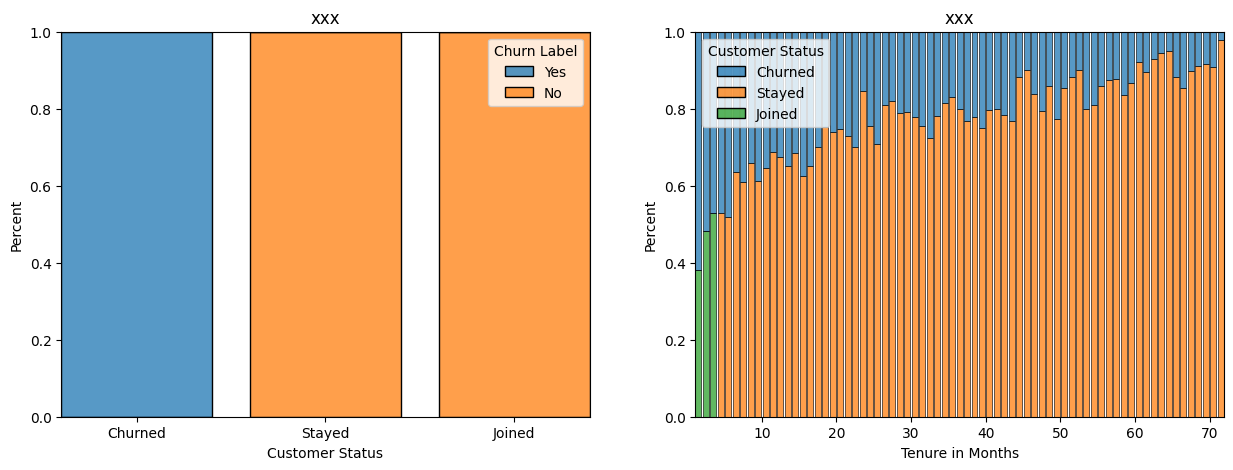

In [16]:
#Plot the relationship between Customer Status, Tenure in Months, and Churn Label
fig, axs = plt.subplots(ncols=2, nrows = 1, figsize=(15,5))

chart = sns.histplot(x = 'Customer Status', data = df_s, hue = 'Churn Label', stat='percent', multiple='fill', shrink=0.8, common_norm=True, ax=axs[0]).set(title='xxx')
chart = sns.histplot(x = 'Tenure in Months', data = df_s, hue = 'Customer Status', stat='percent', multiple='fill', shrink=0.8, common_norm=True, binwidth = 1, ax=axs[1]).set(title='xxx')

The charts indicate that a customer status of Joined must occur within the first 3 months. In the charts, we can see that no user flagged as Joined has left, however, when we use tenure to indicate new customers, it is observed that plenty of recent (within the last 3 months), customers have indeed left the company. Based on this analysis, all observations should remain in the dataset for the model. In addition, the 'Customer Status' field should be removed for two reasons. First, it overlaps with the target we are looking to predict, which means it cannot be used for the prediciton. Second, the rest of the information contained in this field (essentially an encoded bucket of 'Churn Label' and 'Tenure in Months') is already availible to the model in 'Tenure in Months'.

In [17]:
# Drop Customer Status
quick_table_details('df_s', df_s,2)
#Drop fields with an extreamly large amount of nulls
df_s = df_s.drop(['Customer Status'], axis=1)
# Display a summary of table statistics
quick_table_details('df_s', df_s,2)

############################
df_s
############################
----------------------------
number of features (columns) = 48
number of observations (rows) = 7043
----------------------------
object     30
int64      12
float64     6
dtype: int64
----------------------------
############################
df_s
############################
----------------------------
number of features (columns) = 47
number of observations (rows) = 7043
----------------------------
object     29
int64      12
float64     6
dtype: int64
----------------------------


### Review Missing Values in Variables

In [18]:
# Inspect observations (rows) with null values
df_null = df_s.isnull()
df_null['null_count'] = df_null.sum(axis=1)
df_null['null_flag'] = df_null['null_count'].apply(lambda x: 1 if x > 0 else 0)

df_null = df_null[df_null['null_count'] > 0]
print('count of observations with nulls:',df_null['null_flag'].sum())

count of observations with nulls: 5174


In [19]:
# Identify Columns with Nulls
a = [np.nan, None, [], {}, 'NaN', 'Null','NULL','None','NA','?','-', '.','', ' ', '   ']
nc = {}

for c in df_s.columns:
    string_null = np.array([x in a[2:] for x in df_s[c]]).sum()
    std_null = df_s[c].isnull().sum()
    ttl_null = std_null + string_null
    if ttl_null > 0:
        nc[c] = ttl_null

print('number of fields with nulls:', len(nc))
print(pd.Series(nc))

number of fields with nulls: 4
Offer             3877
Internet Type     1526
Churn Category    5174
Churn Reason      5174
dtype: int64


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 2.]),
 array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
         450.,  500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,
         900.,  950., 1000., 1050., 1100., 1150., 1200., 1250., 1300.,
        1350., 1400., 1450., 1500., 1550., 1600., 1650., 1700., 1750.,
        1800., 1850., 1900., 1950., 2000., 2050., 2100., 2150., 2200.,
        2250., 2300., 2350., 2400., 2450., 2500., 2550., 2600., 2650.,
        2700., 2750., 2800., 2850., 2900., 2950., 3000., 3050., 3100.,
        3150., 3200., 3250., 

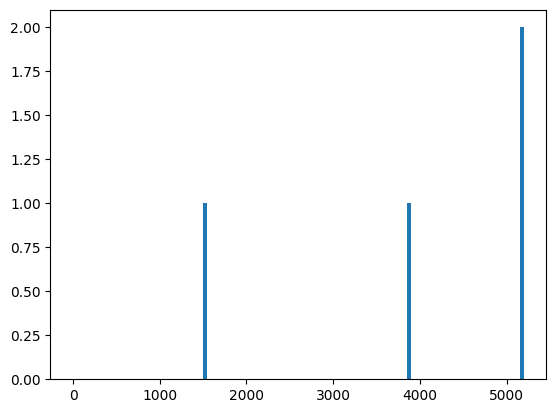

In [20]:
# Make a histogram of null counts
null_counts=pd.Series(nc)
histogram = plt.hist(null_counts, bins = range(0,5250,50)) # replace the histogram to be the plt.hist() object.
histogram

In [21]:
#determine how to handle nulls
total_rows = len(df_s)
print('total rows in dataset:', total_rows, '\n')
df_null_counts = pd.DataFrame(null_counts).reset_index().rename(columns={'index': 'feature', 0: 'nulls'})
df_null_counts['pct'] = df_null_counts['nulls'] / total_rows

features_to_impute = df_null_counts[df_null_counts['pct']<=0.05]['feature']
features_to_throw = df_null_counts[df_null_counts['pct']>0.05]['feature']

print('features to impute:', len(features_to_impute))
print(features_to_impute, '\n')
print('features to throw:', len(features_to_throw))
print(features_to_throw, '\n')

total rows in dataset: 7043 

features to impute: 0
Series([], Name: feature, dtype: object) 

features to throw: 4
0             Offer
1     Internet Type
2    Churn Category
3      Churn Reason
Name: feature, dtype: object 



In [22]:
# Drop Churn Category and Churn Reason based on significant null volumes
# Keep Offer and Internet Type as it valid to have None for these items
quick_table_details('df_s', df_s,2)
#Drop fields with an extreamly large amount of nulls
df_s = df_s.drop(['Churn Category', 'Churn Reason'], axis=1)
# Display a summary of table statistics
quick_table_details('df_s', df_s,2)

############################
df_s
############################
----------------------------
number of features (columns) = 47
number of observations (rows) = 7043
----------------------------
object     29
int64      12
float64     6
dtype: int64
----------------------------
############################
df_s
############################
----------------------------
number of features (columns) = 45
number of observations (rows) = 7043
----------------------------
object     27
int64      12
float64     6
dtype: int64
----------------------------


### Review Categorical Variables

In [37]:
def get_variable_lists(df):
  cat_var = list(df.select_dtypes(['object']).columns)
  num_var = list(df.select_dtypes(['int64', 'float64']).columns)
  print('There are', len(cat_var), 'categorical variables.')
  print('categorical variables =', cat_var)
  print('There are', len(num_var), 'numeric variables.')
  print('numberic variables =', num_var)
  print('\n')

  return cat_var, num_var

def print_variable_lists(cat_var, num_var):
  print('There are', len(cat_var), 'categorical variables.')
  print('categorical variables =', cat_var)
  print('There are', len(num_var), 'numeric variables.')
  print('numberic variables =', num_var)
  print('\n')

def print_value_summary(cat_var, num_var):
  #list unique values in categorical variables
  print('listing unique values for each categorical variable:')
  for c in cat_var:
      unique_values = df_s[c].unique()
      print('--', c, 'has', len(unique_values), 'unique values. They are:', unique_values)
  print('\n')
  print('listing range of values for each numeric variable:')
  for c in num_var:
      unique_values = df_s[c].unique()
      print('--', c, 'has min of', min(unique_values), 'and a max of', max(unique_values))
  print('\n')

In [38]:
cat_var, num_var = get_variable_lists(df_s)
print_variable_lists(cat_var, num_var)
print_value_summary(cat_var, num_var)

There are 23 categorical variables.
categorical variables = ['Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Referred a Friend', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Churn Label']
There are 14 numeric variables.
numberic variables = ['Age', 'Number of Dependents', 'Population', 'Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score']


There are 23 categorical variables.
categorical variables = ['Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Referred a Friend', 'Offer', 'Phone Service', 'Multiple Lines'

In [24]:
# Drop Customer ID, City, Zip Code, State, Country
quick_table_details('df_s', df_s,2)
#Drop fields with too many categories
df_s = df_s.drop(['Customer ID', 'City', 'Zip Code'], axis=1)
#Drop fields with only 1 category
df_s = df_s.drop(['State', 'Country'], axis=1)
# Display a summary of table statistics
quick_table_details('df_s', df_s,2)

############################
df_s
############################
----------------------------
number of features (columns) = 45
number of observations (rows) = 7043
----------------------------
object     27
int64      12
float64     6
dtype: int64
----------------------------
############################
df_s
############################
----------------------------
number of features (columns) = 40
number of observations (rows) = 7043
----------------------------
object     23
int64      11
float64     6
dtype: int64
----------------------------


### Remove Variables Related to Target

In [25]:
quick_table_details('df_s', df_s)

############################
df_s
############################
----------------------------
number of features (columns) = 40
number of observations (rows) = 7043
----------------------------
object     23
int64      11
float64     6
dtype: int64
----------------------------
Index(['Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married', 'Dependents',
       'Number of Dependents', 'Population', 'Referred a Friend',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total 

In [27]:
# Some variable relate to the churn indicator itself and thus should be excluded from the variables
# Drop 'Churn Value', 'Churn Score', 'CLTV'
quick_table_details('df_s', df_s,2)
#Drop fields with too many categories
df_s = df_s.drop(['Churn Value', 'Churn Score', 'CLTV'], axis=1)

# Display a summary of table statistics
quick_table_details('df_s', df_s,2)

############################
df_s
############################
----------------------------
number of features (columns) = 40
number of observations (rows) = 7043
----------------------------
object     23
int64      11
float64     6
dtype: int64
----------------------------
############################
df_s
############################
----------------------------
number of features (columns) = 37
number of observations (rows) = 7043
----------------------------
object     23
int64       8
float64     6
dtype: int64
----------------------------


### Data Type Munging

### Summary of Data Clensing

#### Clensed Data Descriptive Statistics

In [62]:
# Display a summary of table statistics
quick_table_details('df_s', df_s,2)
# Display a summary of the variables
cat_var, num_var = get_variable_lists(df_s)
print_variable_lists(cat_var, num_var)
print_value_summary(cat_var, num_var)
# Finally summary statistics
df_s.describe(include='all')


#### df_s ####
number of features (columns) = 48
number of observations (rows) = 7043
----------------------------
object     30
int64      12
float64     6
dtype: int64
----------------------------
There are 30 categorical variables.
categorical variables = ['Customer ID', 'Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Country', 'State', 'City', 'Referred a Friend', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Customer Status', 'Churn Label', 'Churn Category', 'Churn Reason']
There are 18 numeric variables.
numberic variables = ['Age', 'Number of Dependents', 'Zip Code', 'Population', 'Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges'

,Age,Number of Dependents,Zip Code,Population,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Value,Churn Score,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,22139.603294,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,3.244924,0.265370,58.505040,4400.295755
std,16.750352,0.962802,1856.767505,21152.392837,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,1.201657,0.441561,21.170031,1183.057152
min,19.000000,0.000000,90001.000000,11.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000,1.000000,0.000000,5.000000,2003.000000
25%,32.000000,0.000000,92101.000000,2344.000000,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000,3.000000,0.000000,40.000000,3469.000000
50%,46.000000,0.000000,93518.000000,17554.000000,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000,3.000000,0.000000,61.000000,4527.000000
75%,60.000000,0.000000,95329.000000,36125.000000,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,4.000000,1.000000,75.500000,5380.500000
max,80.000000,9.000000,96150.000000,105285.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,5.000000,1.000000,96.000000,6500.000000


# Exploratory Data Analysis

In [ ]:
#Exploratory Data Analysis

In [ ]:
fig, axes = plt.subplots(nrows = 10, ncols = 5, figsize = (20,20), sharey = True)

for v, column in enumerate(cat_var):
  # Create a chart for each column in the data source
  chart = sns.histplot(x = column, data = df_s, hue = 'Churn Label', ax=axes.flat[v], stat='percent', multiple='fill', shrink=0.8, common_norm=True).set(title=column)
  # Format the Y axis and remove the label
  chart.set_ylabel('')
  # Remove the legend for the chart
  chart.legend_.remove()


fig.suptitle('Customer Churn by Variable')
plt.show()

In [ ]:
df_s.plot.hist(subplots=True, legend = True, layout = (10,5))